In [0]:
import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns 
import matplotlib.pyplot as plt
from pydrive.drive import GoogleDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1UhOoyOL4Tl7lzDwfm7W1lnTZxVTJObes'

In [5]:
fluff, id = link.split('=')
print (id)

1UhOoyOL4Tl7lzDwfm7W1lnTZxVTJObes


In [0]:
downloaded = drive.CreateFile({'id': '1UhOoyOL4Tl7lzDwfm7W1lnTZxVTJObes'}) 
downloaded.GetContentFile('CAGEDEST122018.csv')  
df = pd.read_csv('CAGEDEST122018.csv', sep = ';', encoding = 'latin-1', low_memory=False)

In [7]:
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,Qtd Hora Contrat,IBGE Subsetor,Idade,Ind Aprendiz,Ind Portador Defic,Raça Cor,Salário Mensal,Saldo Mov,Sexo,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Bairros SP,Bairros Fortaleza,Bairros RJ,Distritos SP,Regiões Adm DF,Mesorregião,Microrregião,Região Adm RJ,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,40,25,24,0,0,8,"000954,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50009,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,44,25,25,0,0,2,"002500,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5003,50007,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,55,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,52,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,32,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1


In [0]:
df['Salário Mensal'] = df['Salário Mensal'].astype(str)
df['Salário Mensal'] = df['Salário Mensal'].str.replace(',','.').astype(float)+1

In [9]:
df['Salário Mensal'].head()

0     955.0
1    2501.0
2       1.0
3       1.0
4       1.0
Name: Salário Mensal, dtype: float64

In [10]:
df_spec = df[['Salário Mensal', 'Idade', 'Raça Cor', 'Sexo', 'Grau Instrução']]
df_spec

,Salário Mensal,Idade,Raça Cor,Sexo,Grau Instrução
0,955.0,24,8,1,6
1,2501.0,25,2,1,8
2,1.0,55,8,1,2
3,1.0,52,8,1,2
4,1.0,32,8,1,2
...,...,...,...,...,...
2256747,5511.0,59,8,2,9
2256748,955.0,55,9,2,7
2256749,1001.0,61,8,2,7
2256750,1366.0,22,2,1,8


In [76]:
salario_mensal = df_spec['Salário Mensal']

salario_mensal

0           955.0
1          2501.0
2             1.0
3             1.0
4             1.0
            ...  
2256747    5511.0
2256748     955.0
2256749    1001.0
2256750    1366.0
2256751     997.0
Name: Salário Mensal, Length: 2256752, dtype: float64

In [75]:
salario_mensal_std = np.std(salario_mensal)
salario_mensal_mean = np.mean(salario_mensal)
salario_mensal_ic = scp.stats.norm.interval(0.95, loc=salario_mensal_mean, scale=salario_mensal_std)

salario_mensal_ic

(-2482.8195944054905, 5739.308040632634)

In [0]:
salario_mensal_log = np.log(df_spec['Salário Mensal']+1)


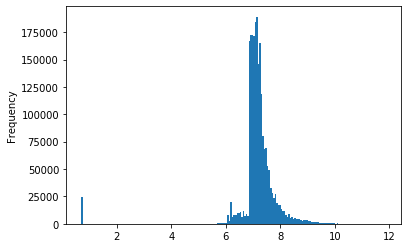

In [14]:
salario_mensal_log.plot.hist(bins=200)

In [15]:
salario_log_std = np.std(salario_mensal_log)
salario_log_mean = np.mean(salario_mensal_log)

salario_ic_max = salario_log_mean + (salario_log_std*2)
salario_ic_min = salario_log_mean - (salario_log_std*2)

salario_ic_max, salario_ic_min, salario_log_std, salario_log_mean

(8.815784838915132, 5.521728944110491, 0.8235139737011601, 7.168756891512811)

In [16]:
salario_mensal_ic = scp.stats.norm.interval(0.95, loc=salario_mensal_mean, scale=salario_mensal_std)
salario_mensal_ic

(-2482.8195944054905, 5739.308040632634)

In [38]:
salarios_altos = []
salarios_baixos = []

for i in salario_mensal:
  if i > 5738.30:
    salarios_altos.append(i)

  else:
    if i != 1:
      salarios_baixos.append(i)

porc_salarios_altos = sum(salarios_altos) / sum(salario_mensal)
porc_qtd_altos = len(salarios_altos) / len(salario_mensal)
porc_altos_vs_baixos = sum(salarios_altos) / sum(salarios_baixos)
porc_salarios_baixos = 1-porc_salarios_altos
porc_altos_desempregados = len(salarios_altos) / len(salarios_baixos)
porc_qtd_baixos = 1-porc_qtd_altos
indice_desemprego = 1-(len(salarios_baixos) / len(salario_mensal))

#Salários mais altos (além ) em relação ao dataset são 1,9% das pessoas que representam 13,5% do total de capital
#O índice de desemprego é de apenas 3%
indice_desemprego, porc_salarios_altos, porc_qtd_altos, porc_altos_vs_baixos, porc_salarios_baixos, porc_qtd_baixos, porc_altos_desempregados

(0.030402100009216837,
 0.1355047332007201,
 0.019658783951448808,
 0.1567455284340454,
 0.8644952667992799,
 0.9803412160485512,
 0.02027519237782557)

In [39]:
salarios_altos_log = np.log(salarios_altos)
salarios_altos_std = np.std(salarios_altos_log)
salarios_altos_mean = np.mean(salarios_altos_log)
salarios_baixos_log = np.log(salarios_baixos)
salarios_baixos_std = np.std(salarios_baixos_log)
salarios_baixos_mean = np.mean(salarios_baixos_log)

salarios_altos_ic = scp.stats.norm.interval(0.95, loc=salarios_altos_mean, scale=salarios_altos_std)
salarios_baixos_ic = scp.stats.norm.interval(0.95, loc=salarios_baixos_mean, scale=salarios_baixos_std)
salarios_altos_ic, salarios_baixos_ic

((8.238732966961049, 10.09842484442348),
 (6.4441225288489985, 7.954191618982895))

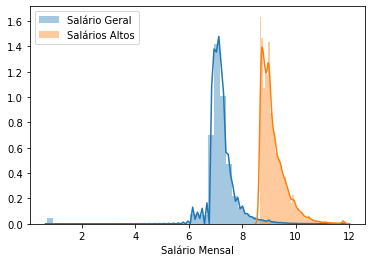

In [29]:
sns.distplot(salario_mensal_log, label='Salário Geral')
sns.distplot(salarios_altos_log, label='Salários Altos');

plt.legend()

((8.238732966961049, 10.09842484442348),
 (6.4441225288489985, 7.954191618982895))

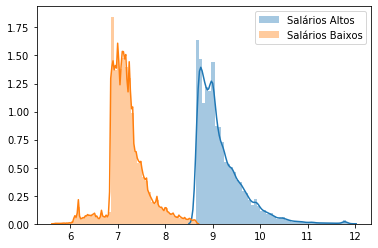

In [40]:
soma_altos = sum(salarios_altos)
soma_baixos = sum(salarios_baixos)

sns.distplot(salarios_altos_log, label='Salários Altos')
sns.distplot(salarios_baixos_log, label='Salários Baixos');

plt.legend(),
#Intervalos de confiança para salários altos e baixos plotados
#Salários altos e baixos não são estatisticamente semelhantes
salarios_altos_ic, salarios_baixos_ic

In [58]:
df_mulheres = df_spec[(df_spec['Sexo'] == 2)]
df_homens = df_spec[(df_spec['Sexo'] == 1)]
porc_mulheres = len(df_mulheres) / len(df_spec['Sexo'])
porc_homens = 1-porc_mulheres

#Mulheres representam 41% da população
df_mulheres['Salário Mensal']

7          1062.0
8             1.0
9             1.0
10            1.0
22         1001.0
            ...  
2256746    5725.0
2256747    5511.0
2256748     955.0
2256749    1001.0
2256751     997.0
Name: Salário Mensal, Length: 933625, dtype: float64

In [0]:
salario_mulheres = df_mulheres['Salário Mensal']
salario_homens = df_homens['Salário Mensal']

In [84]:
salario_mulheres_mean = np.mean(salario_mulheres)
salario_homens_mean = np.mean(salario_homens)
salario_mensal_media = np.mean(salario_mensal)
salario_mulheres_std = np.std(salario_mulheres)
salario_homens_std = np.std(salario_homens)
salario_mulheres_log = np.log(salario_mulheres)
salario_homens_log = np.log(salario_homens)

#Média salarial dos homens é maior que das mulheres
salario_mensal_media, salario_mulheres_mean, salario_homens_mean

(1628.2442231135722, 1522.3851289329227, 1702.9405272509744)

In [85]:
salario_mulheres_ic = scp.stats.norm.interval(0.95, loc=salario_mulheres_mean, scale=salario_mulheres_std)
salario_homens_ic = scp.stats.norm.interval(0.95, loc=salario_homens_mean, scale=salario_homens_std)

((-2513.648995255347, 5919.530049757295),
 (-2425.021501255505, 5469.79175912135))

((-2513.648995255347, 5919.530049757295),
 (-2425.021501255505, 5469.79175912135))

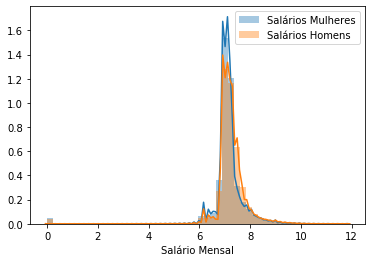

In [89]:
sns.distplot(salario_mulheres_log, label='Salários Mulheres')
sns.distplot(salario_homens_log, label='Salários Homens');

plt.legend()
salarios_homens_ic, salarios_mulheres_ic

In [125]:
homens_ricos = []
mulheres_ricas = []

for i in salario_homens:
  if i > 5919:
    homens_ricos.append(i)

for n in salario_mulheres:
  if n > 5469:
    mulheres_ricas.append(n)

len(homens_ricos), len(mulheres_ricas)

(27609, 17234)

In [97]:
mulheres_mulheres_ricas = len(mulheres_ricas) / len(df_mulheres['Salário Mensal'])
homens_homens_ricos = len(homens_ricos) / len(df_homens['Salário Mensal'])

#A porcentagem de mulheres ricas dentre as mulheres é menor do que a de homens ricos dentre os homens
mulheres_mulheres_ricas, homens_homens_ricos

(0.018459231490159326, 0.020866477669944004)

In [98]:
all_mulheres_ricas = len(mulheres_ricas) / len(df_spec['Salário Mensal'])
all_homens_ricos = len(homens_ricos) / len(df_spec['Salário Mensal'])

all_homens_ricos, all_mulheres_ricas

(0.0122339539302502, 0.007636638850879494)

In [100]:
#O número de mulheres ricas em relação ao dataset inteiro é apenas 62% do número de homens ricos
homens_mulheres_ricas = all_mulheres_ricas / all_homens_ricos
homens_mulheres_ricas

0.6242167409178166

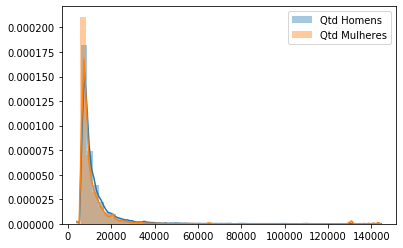

In [127]:
sns.distplot(homens_ricos, label='Qtd Homens')
sns.distplot(mulheres_ricas, label='Qtd Mulheres');

plt.legend()

(0, 1e-05)

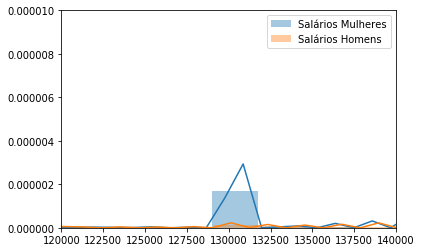

In [120]:
sns.distplot(mulheres_ricas, label='Salários Mulheres')
sns.distplot(homens_ricos, label='Salários Homens');

plt.legend()
plt.xlim(120000, 140000)
plt.ylim(0, 0.000010)

#Pico próximo aos 130k, pode estar enviezando a amostra

In [137]:
salariom_mulheres_ricas = np.mean(mulheres_ricas) / np.mean(df_mulheres['Salário Mensal'])
salarioh_homens_ricos = np.mean(homens_ricos) / np.mean(df_homens['Salário Mensal'])
salarioall_homens_ricos = np.mean(homens_ricos) / np.mean(df_spec['Salário Mensal'])
salarioall_mulheres_ricas = np.mean(mulheres_ricas) / np.mean(df_spec['Salário Mensal'])

#Homens ricos ganham em média 6.8x o salário dos homens e 7.2x o salário da população
#Mulheres ricas ganham em média 6.8x o salário das mulheres e 6.3x o salário da população
salarioall_homens_ricos, salarioall_mulheres_ricas, salarioh_homens_ricos, salariom_mulheres_ricas

(7.1654699577822685, 6.351144572166233, 6.851170007379454, 6.792771594555184)

In [160]:
color_array = df_spec['Raça Cor'].unique()
color_array

array([8, 2, 1, 9, 4, 6])

In [0]:
df_rc1 = df_spec[(df_spec['Raça Cor'] == 1)]
df_rc2 = df_spec[(df_spec['Raça Cor'] == 2)]
df_rc3 = df_spec[(df_spec['Raça Cor'] == 4)]
df_rc4 = df_spec[(df_spec['Raça Cor'] == 6)]
df_rc5 = df_spec[(df_spec['Raça Cor'] == 8)]
df_rc6 = df_spec[(df_spec['Raça Cor'] == 9)]

In [0]:
salario_rc1 = df_rc1['Salário Mensal']
salario_rc2 = df_rc2['Salário Mensal']
salario_rc3 = df_rc3['Salário Mensal']
salario_rc4 = df_rc4['Salário Mensal']
salario_rc5 = df_rc5['Salário Mensal']
salario_rc6 = df_rc6['Salário Mensal']

In [192]:
salario_rc1_mean = np.mean(salario_rc1)
salario_rc2_mean = np.mean(salario_rc2)
salario_rc3_mean = np.mean(salario_rc3)
salario_rc4_mean = np.mean(salario_rc4)
salario_rc5_mean = np.mean(salario_rc5)
salario_rc6_mean = np.mean(salario_rc6)

salario_rc2_mean

1825.9111422037026

In [0]:
lista_salariosrc_mean = [salario_rc1_mean, salario_rc2_mean, 
                            salario_rc3_mean, salario_rc4_mean, salario_rc5_mean, salario_rc6_mean]

In [194]:
#Cor de número 4 tem a maior média salarial
lista_salariosrc_mean

[1768.2401253918495,
 1825.9111422037026,
 1452.7972360229858,
 2112.330215239306,
 1460.304827614948,
 1498.2058303944511]

No handles with labels found to put in legend.


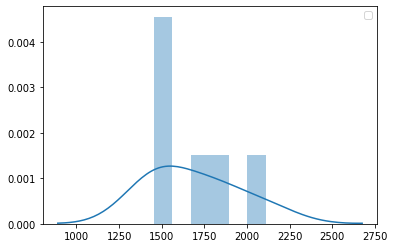

In [195]:
sns.distplot(lista_salariosrc_mean, bins=6)
plt.legend()

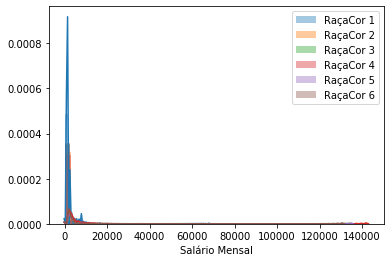

In [199]:
sns.distplot(salario_rc1, label='RaçaCor 1')
sns.distplot(salario_rc2, label='RaçaCor 2')
sns.distplot(salario_rc3, label='RaçaCor 3')
sns.distplot(salario_rc4, label='RaçaCor 4')
sns.distplot(salario_rc5, label='RaçaCor 5')
sns.distplot(salario_rc6, label='RaçaCor 6')

plt.legend()

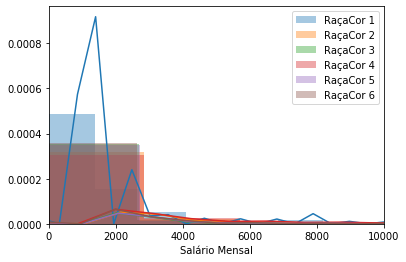

In [205]:
sns.distplot(salario_rc1, label='RaçaCor 1')
sns.distplot(salario_rc2, label='RaçaCor 2')
sns.distplot(salario_rc3, label='RaçaCor 3')
sns.distplot(salario_rc4, label='RaçaCor 4')
sns.distplot(salario_rc5, label='RaçaCor 5')
sns.distplot(salario_rc6, label='RaçaCor 6')

plt.xlim(0, 10000)
plt.legend()